# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [4]:
# Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# plotly	5.24.1

In [5]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 2)

In [6]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


In [8]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [9]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [10]:
# We don't want to treat/drop this feature as this is our target var.
#Drop the rows having null values in the Rating field; 

inp1= inp0[~inp0['Rating'].isnull()]

# or
# inp1 = inp0.dropna(subset='Rating')

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [11]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [12]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [13]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews      Size Installs  Type     Price Content Rating  \
4453      230  11000.00   1,000+  Paid     $1.49       Everyone   
4490      189   2100.00  10,000+  Free         0       Everyone   
10472    3.0M  21516.53     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [14]:
#Drop the row having shifted values
inp1=inp1[~(inp1['Android Ver'].isnull() & (inp1.Category=='1.9'))] 
#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
#Check the most common value in the Android version column

# inp1['Android Ver'].value_counts(dropna=False)
# or 
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [16]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [17]:
#Check the nulls in the Android version column again to cross-verify

# inp1['Android Ver'].value_counts(dropna=False)
# or 
inp1['Android Ver'].isnull().sum()

0

In [18]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0]

'Varies with device'

In [20]:
inp1['Current Ver'].value_counts()

Current Ver
Varies with device                                    1415
1.0                                                    458
1.1                                                    195
1.2                                                    126
1.3                                                    120
2.0                                                    119
1.0.1                                                   80
1.4                                                     77
1.5                                                     73
1.0.0                                                   69
1.6                                                     58
1.0.2                                                   54
2.1                                                     52
1.0.4                                                   48
1.7                                                     47
1.0.3                                                   45
1.2.1                                       

In [21]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
inp1['Current Ver'].isnull().sum()

0

In [22]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].value_counts()

Current Ver
Varies with device                                    1419
1.0                                                    458
1.1                                                    195
1.2                                                    126
1.3                                                    120
2.0                                                    119
1.0.1                                                   80
1.4                                                     77
1.5                                                     73
1.0.0                                                   69
1.6                                                     58
1.0.2                                                   54
2.1                                                     52
1.0.4                                                   48
1.7                                                     47
1.0.3                                                   45
1.2.1                                       

In [23]:
# Question : Can we calculate the average price for the most used android version?
inp1_n = inp1[inp1['Android Ver'] == '4.1 and up']
inp1_n['Price'] = inp1_n['Price'].str.replace('$','').astype(float)
inp1_n['Price'].mean()

0.8191606016496848

#### Handling Incorrect Data Types

In [24]:
#Check the datatypes of all the columns
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [25]:
#Analyse the Price column to check the issue
inp1['Price'].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
$3.99        58
$1.49        31
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$24.99        5
$11.99        5
$12.99        5
$19.99        5
$8.99         4
$5.49         3
$16.99        3
$10.00        3
$3.95         2
$1.00         2
$1.70         2
$17.99        2
$33.99        2
$10.99        2
$79.99        2
$9.00         2
$7.49         2
$39.99        1
$3.04         1
$2.00         1
$3.08         1
$2.59         1
$19.40        1
$3.90         1
$4.59         1
$15.46        1
$4.29         1
$13.99        1
$1.75         1
$3.28         1
$4.60         1
$2.95         1
$2.90         1
$1.97         1
$2.56         1
$14.00        1
$389.99       1
$8.49         1
$4.77         1
$15.99        1
$1.50         1
$3.88         1
$400.00       1
$3.02         1
$1.76         1
$4

In [26]:
#Write the function to make the changes

# inp1['Price'] = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))
# or 
inp1['Price'] = inp1['Price'].str.replace('$','').astype(float)
inp1['Price'].value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
3.99        58
1.49        31
2.49        21
5.99        18
9.99        16
6.99        13
399.99      11
14.99       10
4.49         9
3.49         7
7.99         7
29.99        6
24.99        5
11.99        5
12.99        5
19.99        5
8.99         4
5.49         3
16.99        3
10.00        3
3.95         2
1.00         2
1.70         2
17.99        2
33.99        2
10.99        2
79.99        2
9.00         2
7.49         2
39.99        1
3.04         1
2.00         1
3.08         1
2.59         1
19.40        1
3.90         1
4.59         1
15.46        1
4.29         1
13.99        1
1.75         1
3.28         1
4.60         1
2.95         1
2.90         1
1.97         1
2.56         1
14.00        1
389.99       1
8.49         1
4.77         1
15.99        1
1.50         1
3.88         1
400.00       1
3.02         1
1.76         1
4.84         1
1.61         1
18.99        1
2.50         1
1.59

In [27]:
#Verify the dtype of Price once again
inp1['Price'].dtypes

dtype('float64')

In [28]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up"
inp1_n = inp1[inp1['Android Ver'] == '4.1 and up']
inp1_n['Price'].mean().round(2)

0.82

In [29]:
#Analyse the Reviews column
inp1['Reviews'].dtypes

dtype('O')

In [30]:
pd.reset_option('display.max_rows')
inp1['Reviews'].value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [31]:
#Change the dtype of this column
inp1['Reviews'] = inp1['Reviews'].astype("int")
inp1['Reviews'].dtypes

dtype('int32')

In [32]:
#Check the quantitative spread of this dataframe
pd.set_option('display.float_format', '{:.2f}'.format)
inp1['Reviews'].describe()

count       9366.00
mean      514049.84
std      3144042.13
min            1.00
25%          186.25
50%         5930.50
75%        81532.75
max     78158306.00
Name: Reviews, dtype: float64

In [33]:
#Analyse the Installs Column
inp1['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [34]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1['Installs']= inp1['Installs'].str.rstrip("+").str.replace(',','').astype("int")
inp1['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [35]:
np.percentile(inp1['Installs'],50)

500000.0

In [36]:
inp1['Installs'].describe()

count         9366.00
mean      17897443.73
std       91238217.38
min              1.00
25%          10000.00
50%         500000.00
75%        5000000.00
max     1000000000.00
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [37]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [38]:
#Perform the sanity checks on the Rating column
inp1['Rating'].describe()

count   9366.00
mean       4.19
std        0.52
min        1.00
25%        4.00
50%        4.30
75%        4.50
max        5.00
Name: Rating, dtype: float64

In [39]:
#Perform the sanity checks on the Revies column
len(inp1[ (inp1['Reviews'] > inp1['Installs']) ])

7

In [40]:
# droping the inp1['Reviews'] > inp1['Installs'] rows, as these are misleading
inp1 = inp1 [ (inp1['Reviews'] <= inp1['Installs']) ]
len(inp1)

9359

In [41]:
#perform the sanity checks on prices of free apps
inp1[ (inp1['Type'] == 'Free') & (inp1['Price']>0) ]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [42]:
#import the plotting libraries
import matplotlib.pyplot as plt

In [43]:
inp1['Price'].describe()

count   9359.00
mean       0.96
std       15.82
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      400.00
Name: Price, dtype: float64

In [44]:
Q1= np.percentile(inp1['Price'],25)
Q3= np.percentile(inp1['Price'],75)
IQR = Q3-Q1

print (Q1,Q3,IQR)

0.0 0.0 0.0


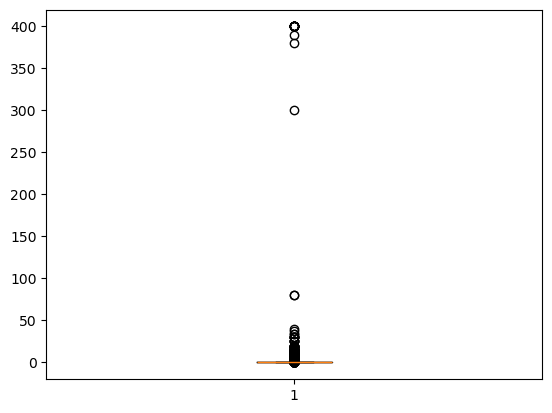

In [45]:
#Create a box plot for the price column
plt.boxplot(inp1['Price'])
plt.show()

In [46]:
pd.set_option('display.max_rows', None) 
value_counts = inp1['Price'].value_counts(dropna=False).reset_index().sort_values(by='Price')
value_counts

Price  count
0    0.00   8715
2    0.99    106
26   1.00      2
72   1.20      1
68   1.29      1
6    1.49     30
57   1.50      1
66   1.59      1
63   1.61      1
27   1.70      2
45   1.75      1
61   1.76      1
50   1.97      1
4    1.99     59
36   2.00      1
7    2.49     20
65   2.50      1
51   2.56      1
38   2.59      1
49   2.90      1
48   2.95      1
1    2.99    114
60   3.02      1
35   3.04      1
37   3.08      1
46   3.28      1
14   3.49      7
58   3.88      1
40   3.90      1
25   3.95      2
5    3.99     58
43   4.29      1
13   4.49      9
41   4.59      1
47   4.60      1
55   4.77      1
62   4.84      1
3    4.99     70
22   5.49      3
8    5.99     18
67   6.49      1
10   6.99     13
33   7.49      2
15   7.99      7
54   8.49      1
21   8.99      4
32   9.00      2
9    9.99     16
24  10.00      3
30  10.99      2
18  11.99      5
19  12.99      5
44  13.99      1
52  14.00      1
12  14.99     10
42  15.46      1
56  15.99      1
23  16.99      3
28  17.99      2
64  18.99      1
39  19.40      1
20  19.99      5
17  24.99      5
16  29.99      6
29  33.99      2
71  37.99      1
34  39.99      1
31  79.99      2
69 299.99      1
70 379.99      1
53 389.99      1
11 399.99     11
59 400.00      1

In [47]:
#Check the apps with price more than 200
inp1[inp1['Price']>=200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY    4.30        6  1500.00   
4362                      💎 I'm rich  LIFESTYLE    3.80      718 26000.00   
4367        I'm Rich - Trump Edition  LIFESTYLE    3.60      275  7300.00   
5351                       I am rich  LIFESTYLE    3.80     3547  1800.00   
5354                  I am Rich Plus     FAMILY    4.00      856  8700.00   
5355                   I am rich VIP  LIFESTYLE    3.80      411  2600.00   
5356               I Am Rich Premium    FINANCE    4.10     1867  4700.00   
5357             I am extremely Rich  LIFESTYLE    2.90       41  2900.00   
5358                      I am Rich!    FINANCE    3.80       93 22000.00   
5359              I am rich(premium)    FINANCE    3.50      472   965.00   
5362                   I Am Rich Pro     FAMILY    4.40      201  2700.00   
5364  I am rich (Most expensive app)    FINANCE    4.10      129  2700.00   
5366                       I Am Rich     FAMILY    3.60      217  4900.00   
5369                       I am Rich    FINANCE    4.30      180  3800.00   
5373              I AM RICH PRO PLUS    FINANCE    4.00       36 41000.00   

      Installs  Type  Price Content Rating         Genres       Last Updated  \
4197       100  Paid 399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid 399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid 400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid 399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid 399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid 299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid 399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid 379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid 399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid 399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid 399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid 399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid 389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid 399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid 399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [48]:
#Clean the Price column
inp1 = inp1[inp1['Price']<200]

In [49]:
inp1['Price'].describe()

count   9344.00
mean       0.33
std        2.17
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       79.99
Name: Price, dtype: float64

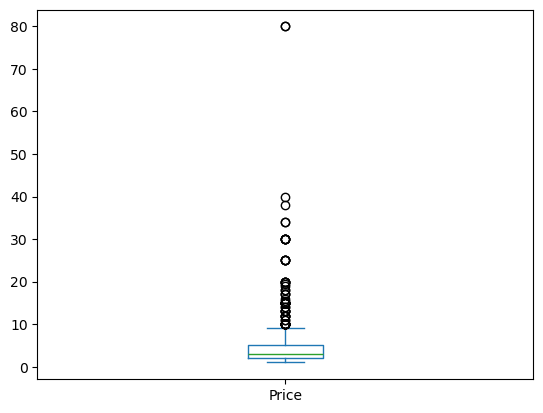

In [50]:
#Create a box plot for paid apps
inp1[inp1['Type']!='Free'].Price.plot.box()
plt.show()

In [51]:
#Check the apps with price more than 30
inp1[inp1['Price']>=30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL    4.60       92 32000.00   
2301    A Manual of Acupuncture    MEDICAL    3.50      214 68000.00   
2365  Vargo Anesthesia Mega App    MEDICAL    4.60       92 32000.00   
2402    A Manual of Acupuncture    MEDICAL    3.50      214 68000.00   
2414               LTC AS Legal    MEDICAL    4.00        6  1300.00   
5360           I am Rich Person  LIFESTYLE    4.20      134  1800.00   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [52]:
#Clean the Price column again
inp1 = inp1[inp1['Price']<=30]
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [53]:
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

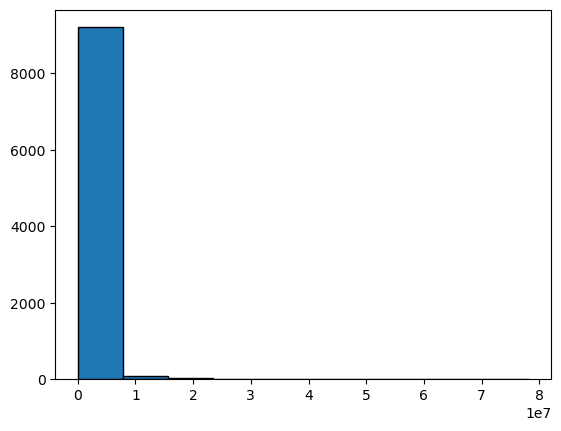

In [54]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews, edgecolor='black') 
plt.show()

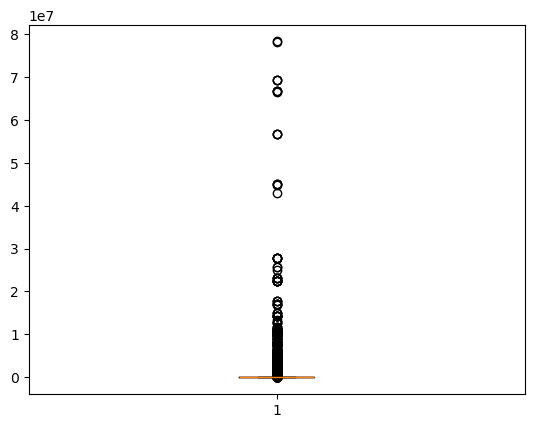

In [55]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [56]:
#Check records with 1 million reviews
inp1[inp1.Reviews>1000000]

App             Category  \
139                                 Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   
152                                    Google Play Books  BOOKS_AND_REFERENCE   
189                                          Uber Driver             BUSINESS   
194               OfficeSuite : Free Office + PDF Editor             BUSINESS   
201                               Facebook Pages Manager             BUSINESS   
293               OfficeSuite : Free Office + PDF Editor             BUSINESS   
297                           LINE WEBTOON - Free Comics               COMICS   
335             Messenger – Text and Video Chat for Free        COMMUNICATION   
336                                   WhatsApp Messenger        COMMUNICATION   
338                         Google Chrome: Fast & Secure        COMMUNICATION   
339                Messenger Lite: Free Calls & Messages        COMMUNICATION   
340                                                Gmail        COMMUNICATION   
341                                             Hangouts        COMMUNICATION   
342                                      Viber Messenger        COMMUNICATION   
344                       Firefox Browser fast & private        COMMUNICATION   
345                          Yahoo Mail – Stay Organized        COMMUNICATION   
347                        imo free video calls and chat        COMMUNICATION   
351                        Opera Mini - fast web browser        COMMUNICATION   
356                       Opera Browser: Fast and Secure        COMMUNICATION   
363                                                  Who        COMMUNICATION   
365                                               WeChat        COMMUNICATION   
366          UC Browser Mini -Tiny Fast Private & Secure        COMMUNICATION   
370                                             Telegram        COMMUNICATION   
371                Google Duo - High Quality Video Calls        COMMUNICATION   
378          UC Browser - Fast Download Private & Secure        COMMUNICATION   
381                                   WhatsApp Messenger        COMMUNICATION   
382             Messenger – Text and Video Chat for Free        COMMUNICATION   
383                        imo free video calls and chat        COMMUNICATION   
385                                      Viber Messenger        COMMUNICATION   
386                                             Hangouts        COMMUNICATION   
390                                               WeChat        COMMUNICATION   
391                        Skype - free IM & video calls        COMMUNICATION   
392                                             Telegram        COMMUNICATION   
393                                                  Who        COMMUNICATION   
395           GO SMS Pro - Messenger, Free Themes, Emoji        COMMUNICATION   
403                          LINE: Free Calls & Messages        COMMUNICATION   
406                          BBM - Free Calls & Messages        COMMUNICATION   
407                         KakaoTalk: Free Calls & Text        COMMUNICATION   
411                         Google Chrome: Fast & Secure        COMMUNICATION   
412                       Firefox Browser fast & private        COMMUNICATION   
413    CM Browser - Ad Blocker , Fast Download , Privacy        COMMUNICATION   
415                       Opera Browser: Fast and Secure        COMMUNICATION   
417                        Opera Mini - fast web browser        COMMUNICATION   
418           Dolphin Browser - Fast, Private & Adblock🐬        COMMUNICATION   
419          UC Browser Mini -Tiny Fast Private & Secure        COMMUNICATION   
420          UC Browser - Fast Download Private & Secure        COMMUNICATION   
424                         DU Browser—Browse fast & fun        COMMUNICATION   
431                                      Viber Messenger        COMMUNICATION   
449    Truecaller: Caller ID, SMS spam blocking & Dialer        COMMUNICATION   
451

In [57]:
#Drop the above records; as it might had preinstalled or already popular.
inp1 = inp1[inp1.Reviews<=1000000]
inp1.shape

(8634, 13)

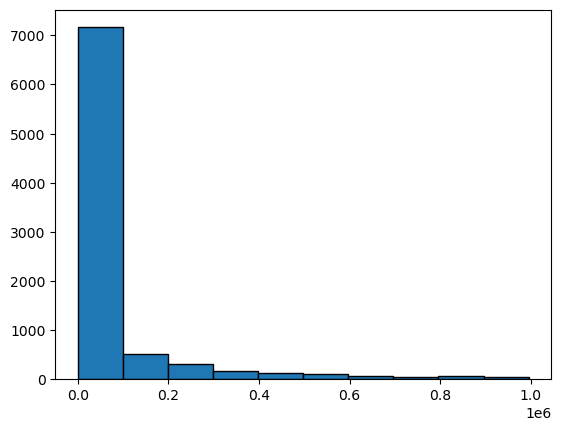

In [58]:
#Question - Create a histogram again and check the peaks
plt.hist(inp1.Reviews, edgecolor='black') 
plt.show()

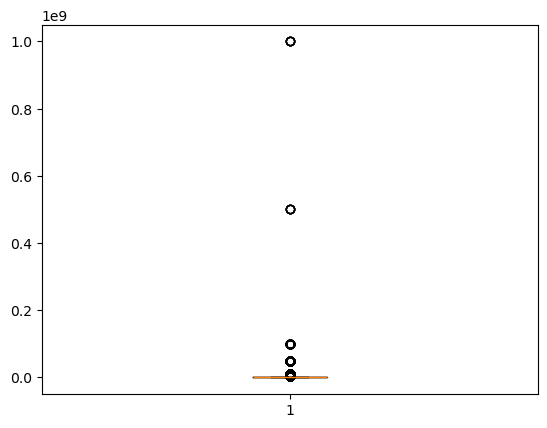

In [59]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()

In [60]:
IQR = np.percentile(inp1.Installs,75) - np.percentile(inp1.Installs,25)
IQR / 10**5

9.9

In [61]:
#Now, remove all the apps which have the number of installs greater than 100 million
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(8624, 13)

In [62]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1[inp1.Installs < 100000000]
inp1.shape

(8624, 13)

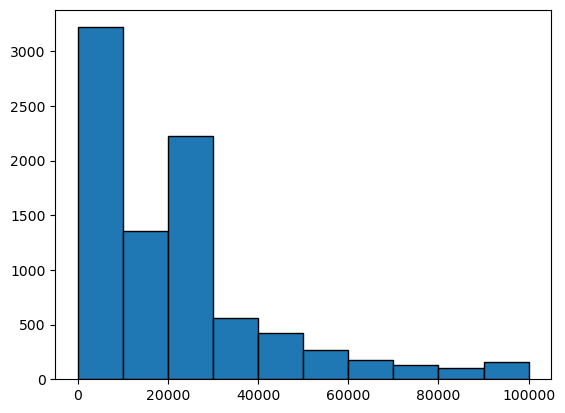

In [63]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size, edgecolor='black') 
plt.show()

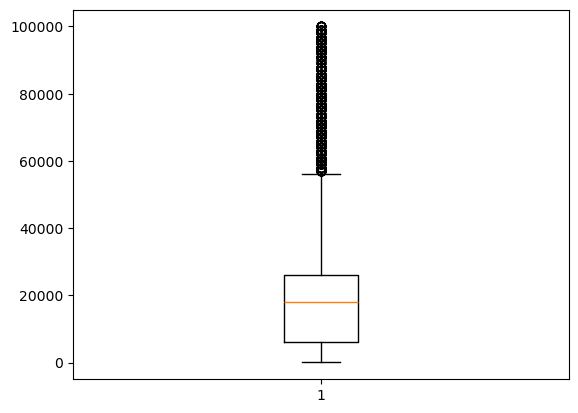

In [64]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Size)
plt.show()

In [65]:
inp1.Size.describe()

count     8624.00
mean     21634.93
std      20668.25
min          8.50
25%       6000.00
50%      18000.00
75%      26000.00
max     100000.00
Name: Size, dtype: float64

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [66]:
#import the necessary libraries


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve.

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [67]:
import seaborn as sns

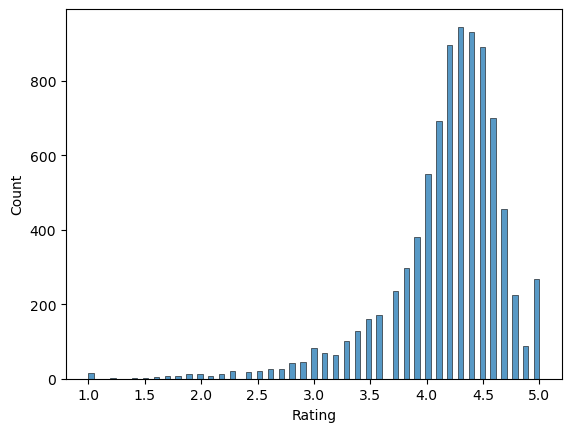

In [68]:
#Create a distribution plot for rating
sns.histplot(inp1.Rating)
plt.show()

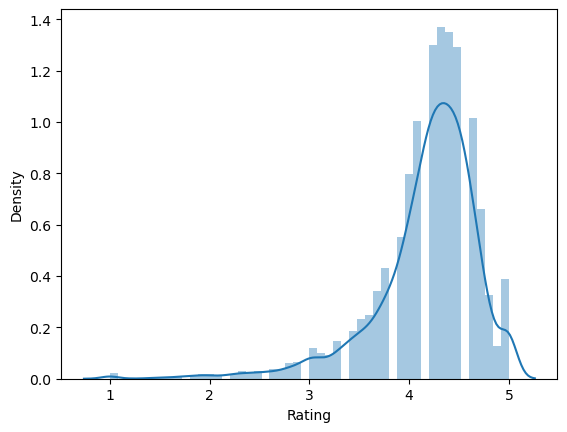

In [69]:
sns.distplot(inp1.Rating)  
plt.show()
# NOTE: The distplot function is deprecated, but you can still use it. It will stop working in Seaborn 0.14.
# 1 - sns.histplot() -- sns.histplot(data=None, *, x=None, y=None, hue=None)
# 2 - sns.displot() -- sns.displot(inp1.Rating, kde=True)

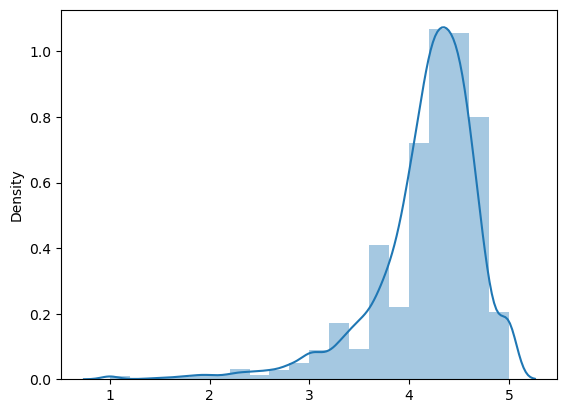

In [70]:
#Change the number of bins
sns.distplot(x=inp1.Rating, bins=20, kde=True)
plt.show()

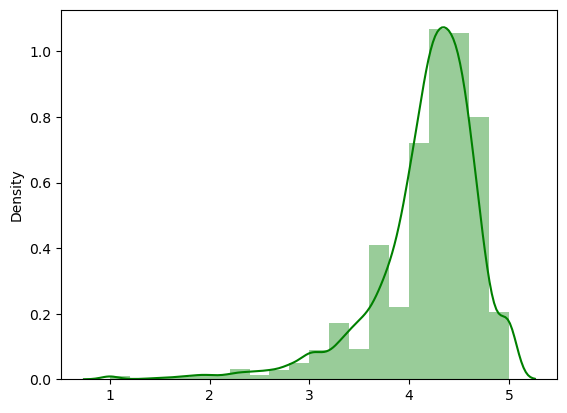

In [71]:
#Change the colour of bins to green
sns.distplot(x=inp1.Rating, kde=True, bins=20, color='green')
plt.show()

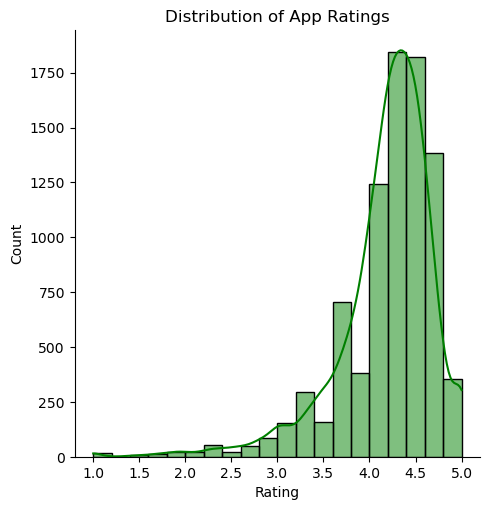

In [72]:
#Apply matplotlib functionalities
sns.displot(x=inp1.Rating, kde=True, bins=20, color='green')
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [73]:
#Check all the styling options
?sns.set_style

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\users\samrat\anaconda3\lib\site-packages\seaborn\rcmod.py
Type:      function

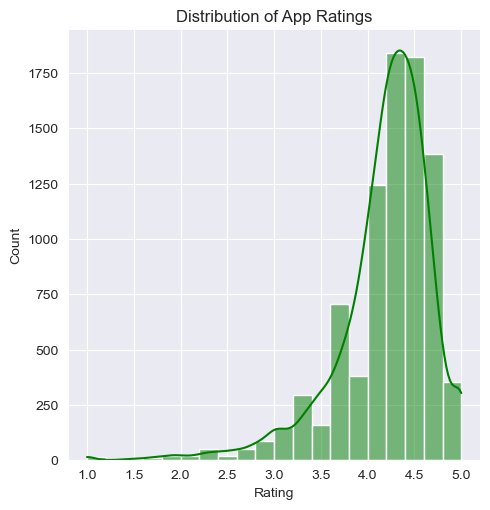

In [74]:
#Change the number of bins to 20
sns.set_style('darkgrid')
sns.displot(x=inp1.Rating, kde=True, bins=20, color='green')
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

In [75]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [76]:
plt.style.use('seaborn-v0_8')

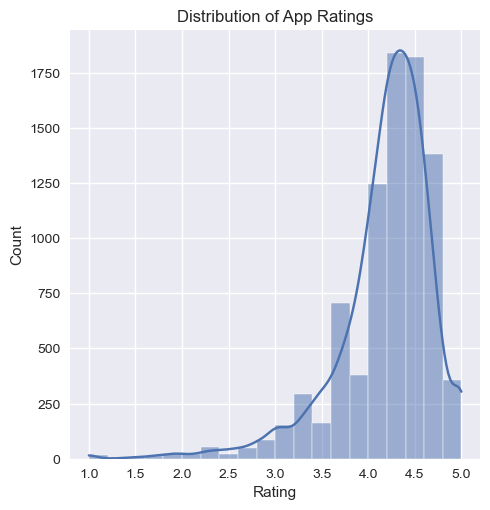

In [77]:
sns.set_style(None)
sns.displot(x=inp1.Rating, kde=True, bins=20)
plt.title("Distribution of App Ratings", fontsize=12)
plt.show()

In [78]:
plt.style.use('default')

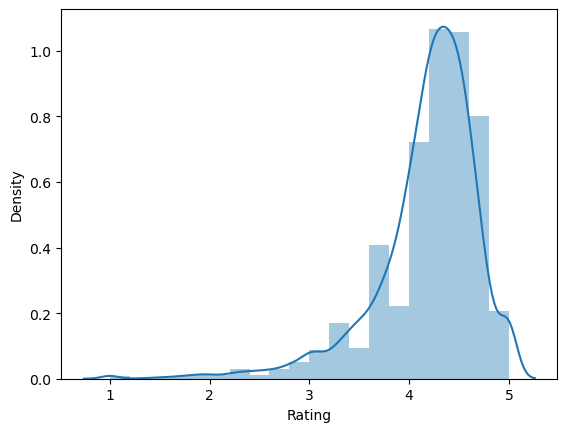

In [79]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [83]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Content Rating
Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [88]:
#Remove the rows with values which are less represented
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]
inp1.shape

(8620, 13)

In [89]:
#Reset the index
inp1.reset_index(drop=True, inplace=True)

In [101]:
#Check the apps belonging to different categories of Content Rating
inp1[['Content Rating', 'App']].value_counts().unstack().fillna(0)

App             +Download 4 Instagram Twitter  - Free Comics - Comic Apps  \
Content Rating                                                              
Everyone                                 1.00                        0.00   
Everyone 10+                             0.00                        0.00   
Mature 17+                               0.00                        1.00   
Teen                                     0.00                        0.00   

App              .R  /u/app  058.ba  1. FC Köln App  10 Best Foods for You  \
Content Rating                                                               
Everyone       1.00    0.00    1.00            1.00                   0.00   
Everyone 10+   0.00    0.00    0.00            0.00                   2.00   
Mature 17+     0.00    1.00    0.00            0.00                   0.00   
Teen           0.00    0.00    0.00            0.00                   0.00   

App             10 Minutes a Day Times Tables  \
Content Rating                                  
Everyone                                 1.00   
Everyone 10+                             0.00   
Mature 17+                               0.00   
Teen                                     0.00   

App             10 WPM Amateur ham radio CW Morse code trainer  \
Content Rating                                                   
Everyone                                                  1.00   
Everyone 10+                                              0.00   
Mature 17+                                                0.00   
Teen                                                      0.00   

App             10,000 Quotes DB (Premium)  100 Doors of Revenge  \
Content Rating                                                     
Everyone                              1.00                  0.00   
Everyone 10+                          0.00                  0.00   
Mature 17+                            0.00                  0.00   
Teen                                  0.00                  1.00   

App             100+ C Programs  \
Content Rating                    
Everyone                   1.00   
Everyone 10+               0.00   
Mature 17+                 0.00   
Teen                       0.00   

App             100000+ Messages - DP, Status, Jokes & GIF 2018  \
Content Rating                                                    
Everyone                                                   0.00   
Everyone 10+                                               0.00   
Mature 17+                                                 1.00   
Teen                                                       0.00   

App             101 C Programming Problems  \
Content Rating                               
Everyone                              1.00   
Everyone 10+                          0.00   
Mature 17+                            0.00   
Teen                                  0.00   

App             104 Looking for a job - looking for a job, looking for a job, looking for a part-time job, health checkup, resume, treatment room  \
Content Rating                                                                                                                                      
Everyone                                                     1.00                                                                                   
Everyone 10+                                                 0.00                                                                                   
Mature 17+                                                   0.00                                                                                   
Teen                                                         0.00                                                                                   

App             11st  12 Step Meditations & Sober Prayers AA NA AL-ANON  \
Content Rating                                                            
Everyone        1.00           

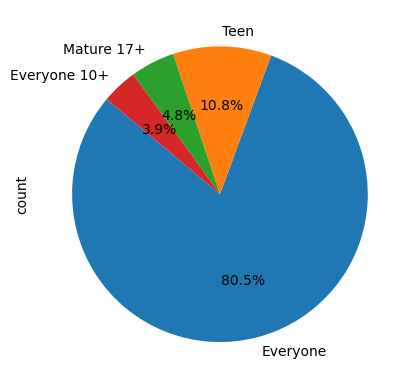

In [108]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.show()

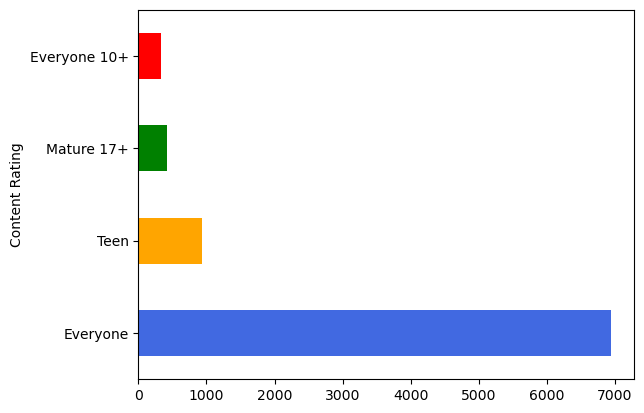

In [120]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.barh(color=['royalblue', 'orange','green','red'])
plt.show()

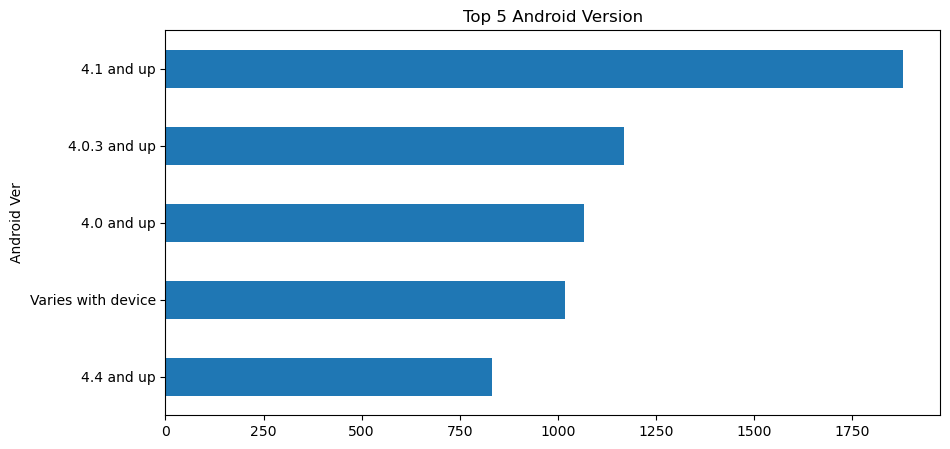

In [128]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts().head(5).sort_values().plot(
    kind="barh", figsize=[10,5], title='Top 5 Android Version')
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

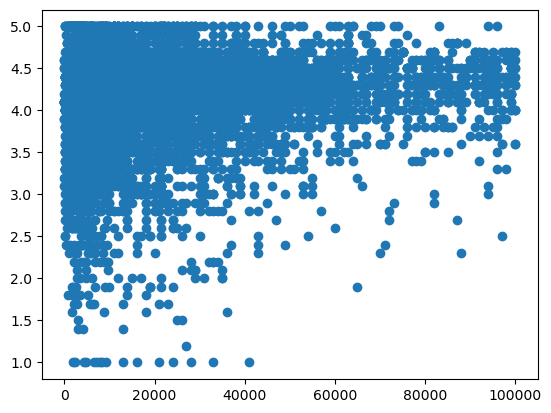

In [167]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter( inp1.Size, inp1.Rating)
plt.show()

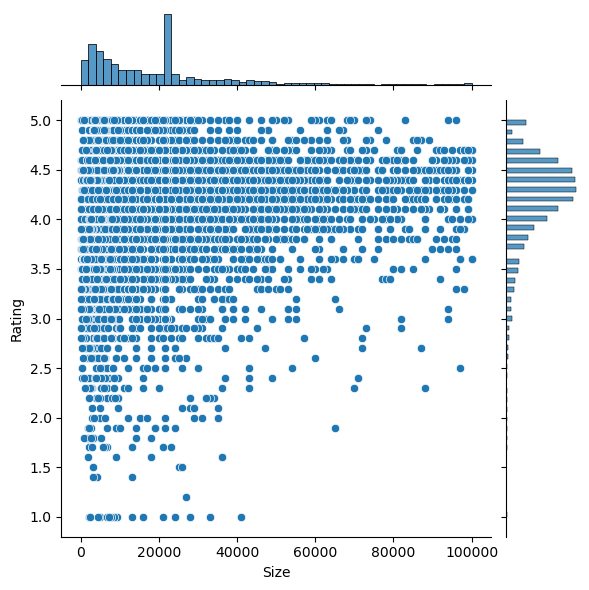

In [173]:
### Plot the same thing now using a jointplot
sns.jointplot( x = 'Size', y = 'Rating', data = inp1)
plt.show()

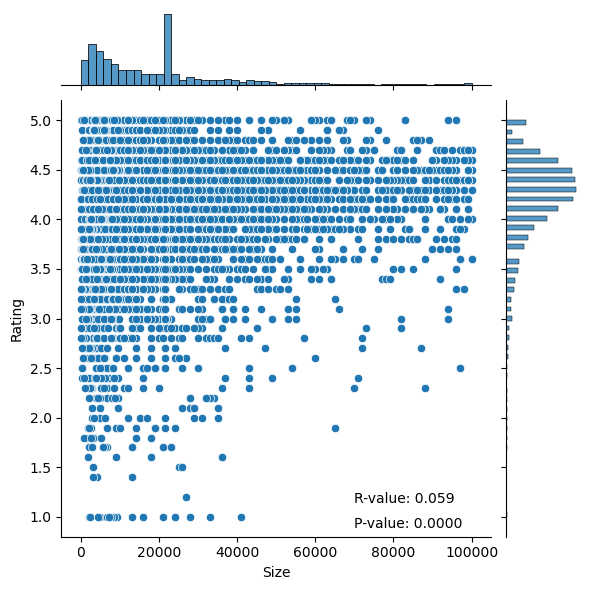

In [200]:
import scipy.stats as stats

# str1 will hold the value of Pearson r
r_value, p_value = stats.pearsonr(inp1.Size, inp1.Rating)

# Create the joint plot
g = sns.jointplot(x="Size", y="Rating", data=inp1)

# Manually align the position of str1 and str2
plt.text(70000, 1.25, f'R-value: {r_value:.3f}', horizontalalignment='left', verticalalignment='top', fontsize=10)
plt.text(70000, 1.0, f'P-value: {p_value:.4f}', horizontalalignment='left', verticalalignment='top', fontsize=10)

plt.show()

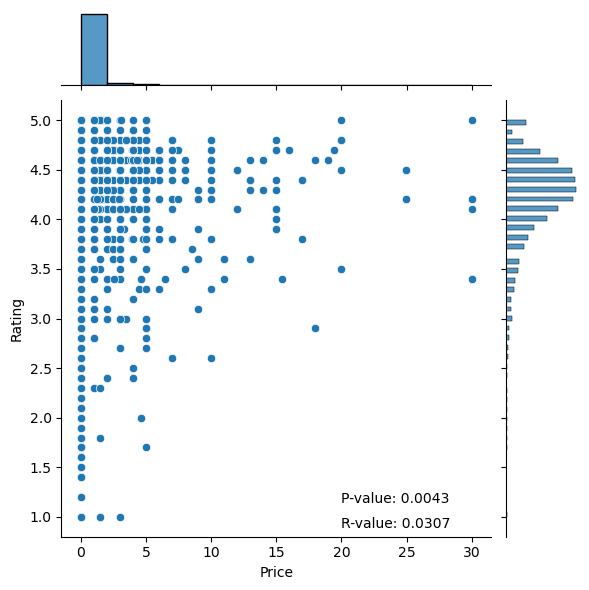

In [201]:
import scipy.stats as stats
## Plot a jointplot for Price and Rating
sns.jointplot( x = 'Price', y = 'Rating', data = inp1)

slope, intercept, r_value, p_value, std_err = stats.linregress(inp1['Price'], inp1['Rating'])
plt.text(20, 1.25, f'P-value: {p_value:.4f}', ha='left', va='top', fontsize=10)
plt.text(20, 1, f'R-value: {r_value:.4f}', ha='left', va='top', fontsize=10)

plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view

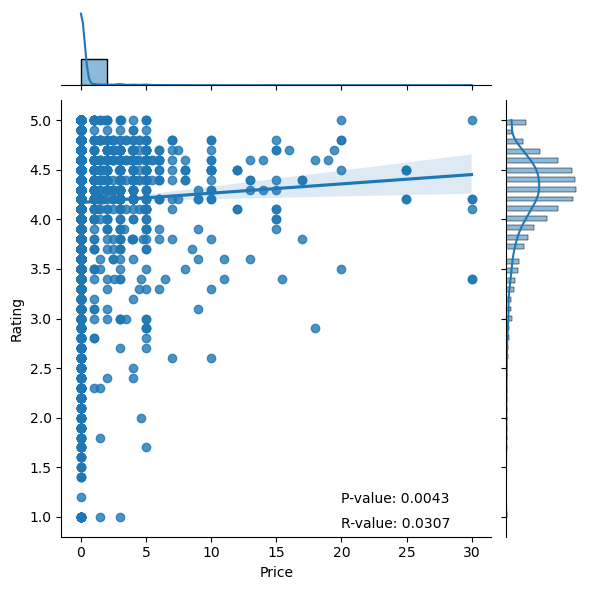

In [203]:
##Plot a reg plot for Price and Rating and observe the trend
import scipy.stats as stats
## Plot a jointplot for Price and Rating
sns.jointplot( x = 'Price', y = 'Rating', data = inp1, kind='reg')

slope, intercept, r_value, p_value, std_err = stats.linregress(inp1['Price'], inp1['Rating'])
plt.text(20, 1.25, f'P-value: {p_value:.4f}', ha='left', va='top', fontsize=10)
plt.text(20, 1, f'R-value: {r_value:.4f}', ha='left', va='top', fontsize=10)

plt.show()


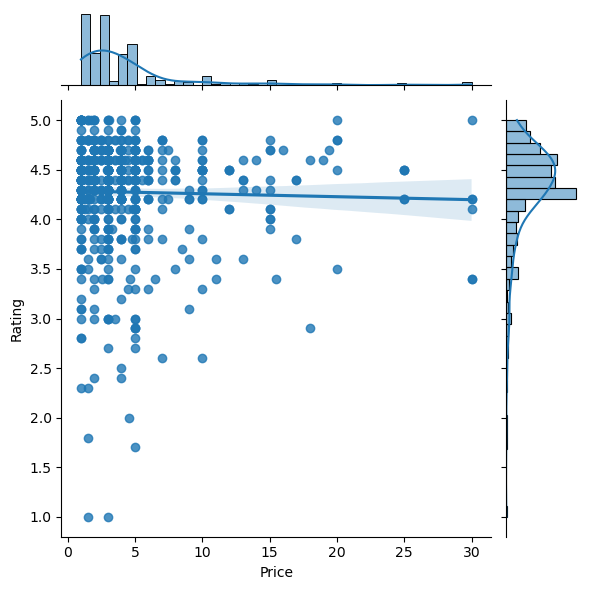

In [216]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot( x = 'Price', y = 'Rating', data = inp1[inp1.Type!='Free'], kind='reg')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

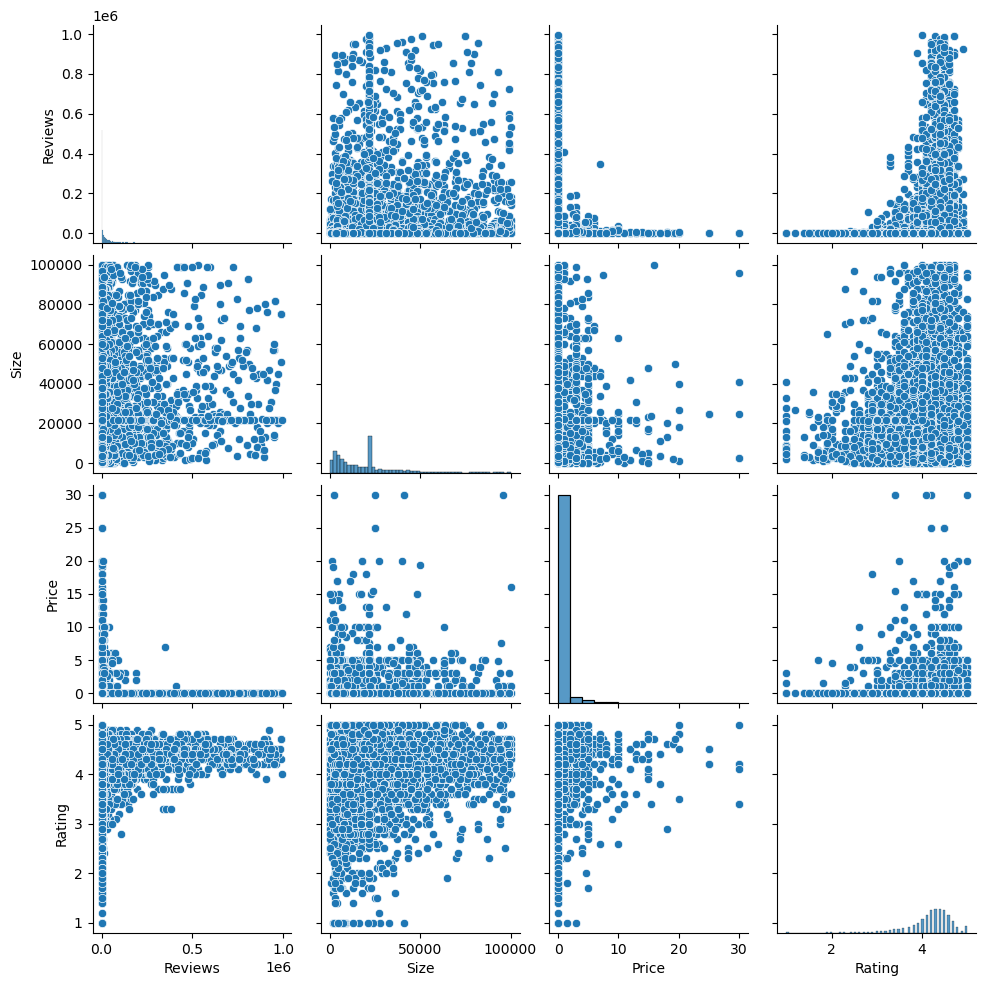

In [208]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[['Reviews', 'Size', 'Price', 'Rating']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

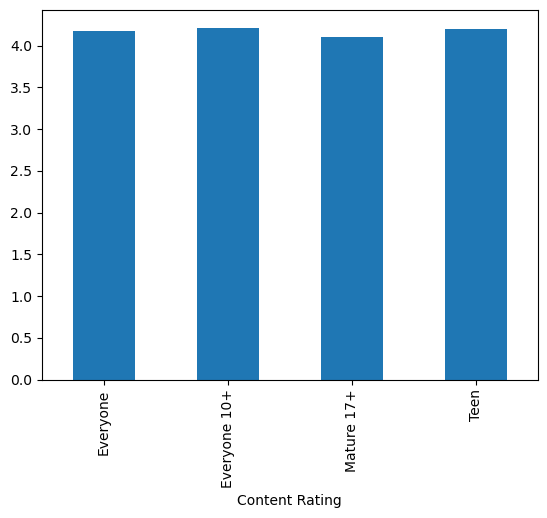

In [212]:
##Plot a bar plot of Content Rating vs Average Rating
inp1.groupby('Content Rating')['Rating'].mean().plot.bar()
plt.show()

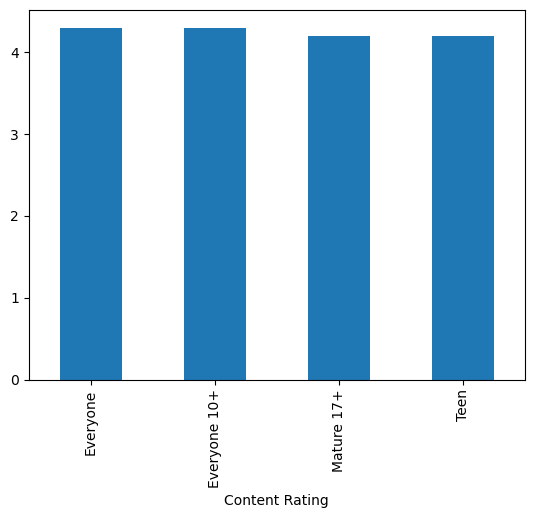

In [213]:
##Plot the bar plot again with Median Rating
inp1.groupby('Content Rating')['Rating'].median().plot.bar()
plt.show()

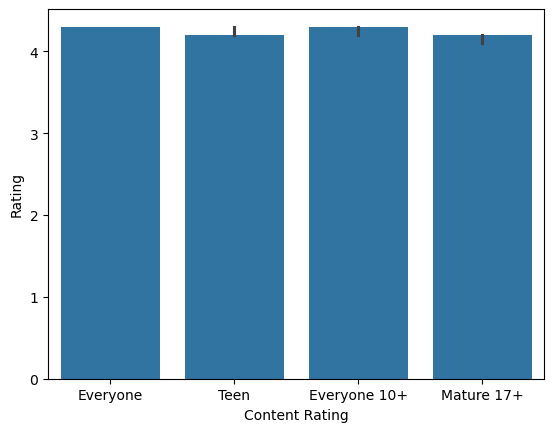

In [230]:
##Plot the above bar plot using the estimator parameter
sns.barplot(x='Content Rating', y='Rating', data = inp1, estimator=np.median)
plt.show()

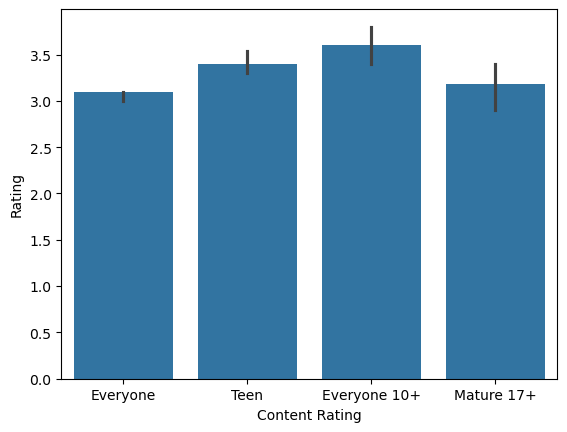

In [231]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(x='Content Rating', y='Rating', data = inp1, estimator=lambda x: np.quantile(x,0.05))

plt.show()

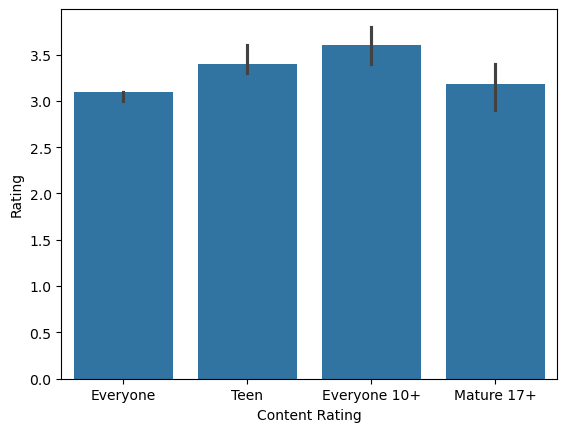

In [232]:
# or
sns.barplot(x='Content Rating', y='Rating', data = inp1, estimator=lambda x: np.percentile(x,5))

plt.show()

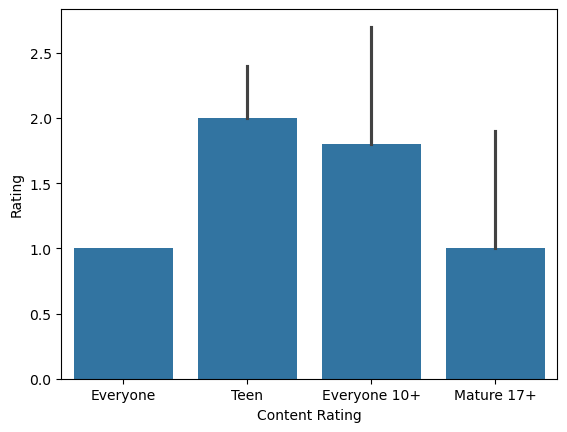

In [240]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(x='Content Rating', y='Rating', data = inp1, estimator=np.min)
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




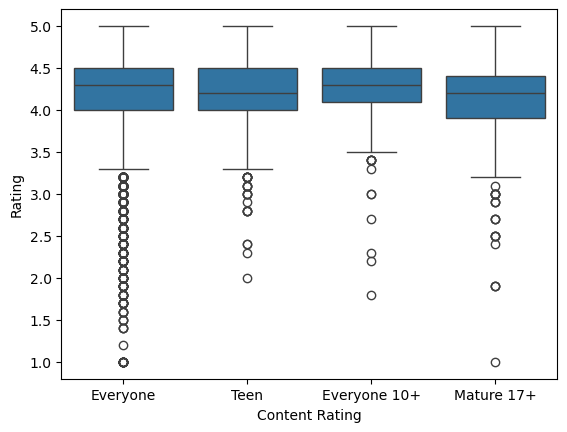

In [243]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(x=inp1['Content Rating'], y=inp1['Rating'])
plt.show()

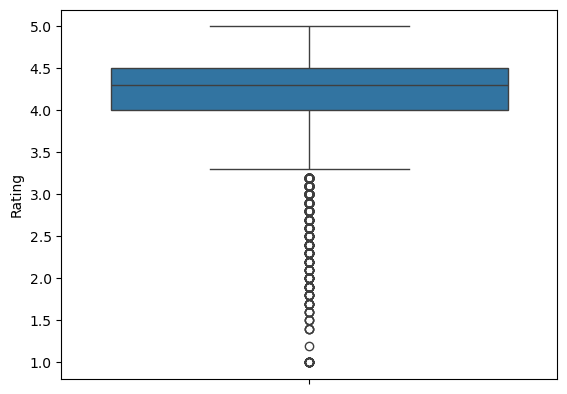

In [245]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(inp1['Rating'])
plt.show()

In [269]:
col=inp1.Genres.value_counts().head(4).reset_index()
inp2 = inp1[inp1['Genres'].isin(col.Genres)]
inp2.shape

(2010, 13)

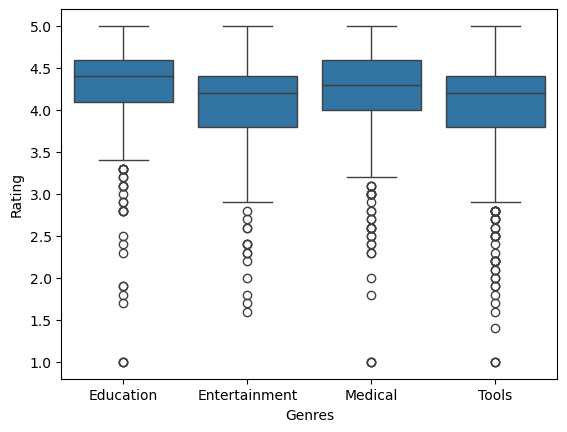

In [274]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
sns.boxplot(x=inp2['Genres'], y=inp2['Rating'])
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [277]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
inp1['Size_bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'] )
inp1['Size_bucket'].value_counts()

Size_bucket
M     2427
L     1778
VL    1747
VH    1716
H      952
Name: count, dtype: int64

In [281]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1  , index='Content Rating' , columns='Size_bucket' , values='Rating')

Size_bucket      VL    L    M    H   VH
Content Rating                         
Everyone       4.12 4.16 4.22 4.17 4.19
Everyone 10+   4.19 4.21 4.24 4.19 4.22
Mature 17+     3.98 4.12 4.02 4.16 4.19
Teen           4.18 4.23 4.14 4.20 4.25

In [282]:
##Change the aggregation to median
pd.pivot_table(data=inp1  , index='Content Rating' , columns='Size_bucket' , values='Rating', aggfunc=np.median)

Size_bucket      VL    L    M    H   VH
Content Rating                         
Everyone       4.20 4.30 4.30 4.30 4.30
Everyone 10+   4.10 4.30 4.30 4.30 4.30
Mature 17+     4.25 4.20 4.10 4.10 4.20
Teen           4.20 4.30 4.20 4.20 4.30

In [283]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1  , index='Content Rating' , columns='Size_bucket' , values='Rating', aggfunc= lambda x: np.percentile(x,20))

Size_bucket      VL    L    M    H   VH
Content Rating                         
Everyone       3.80 3.80 4.00 3.80 3.90
Everyone 10+   3.86 3.92 4.10 4.00 4.00
Mature 17+     3.30 3.68 3.70 3.90 4.00
Teen           3.80 3.90 3.90 4.00 4.00

In [285]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data=inp1  , index='Content Rating' , columns='Size_bucket' , values='Rating', aggfunc= lambda x: np.percentile(x,20))

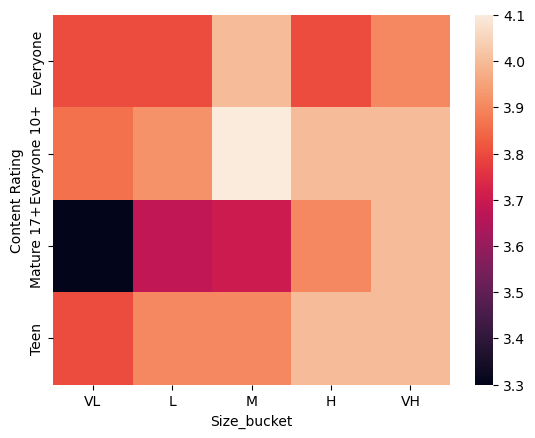

In [289]:
##Plot a heat map
sns.heatmap(res)
plt.show()

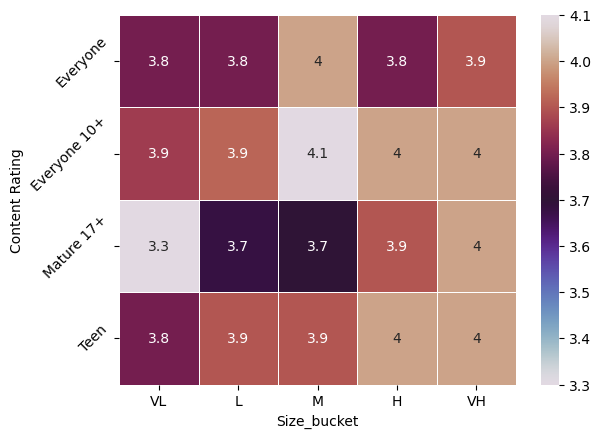

In [296]:
##Apply customisations
sns.heatmap(res,annot=True, cmap='twilight', linewidths=0.5)
plt.yticks(rotation=45)
plt.show()

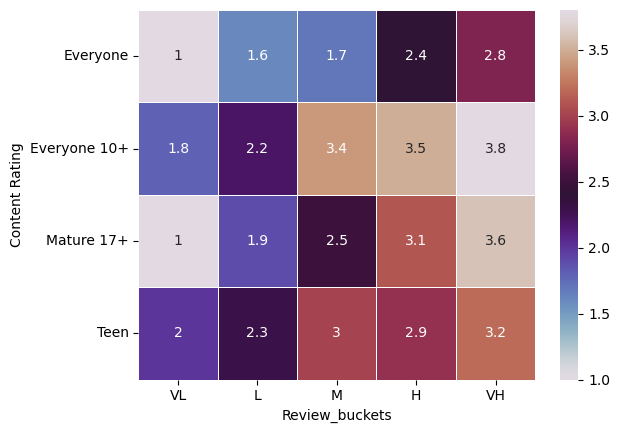

In [336]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp1['Review_buckets'] = pd.qcut(inp1.Reviews, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'] )

res1=pd.pivot_table(data=inp1  , index='Content Rating' , columns='Review_buckets' , values='Rating', aggfunc= min)

sns.heatmap(res1,annot=True, cmap='twilight', linewidths=0.5)
plt.yticks(rotation=360)
plt.show()

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [321]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             8620 non-null   object  
 1   Category        8620 non-null   object  
 2   Rating          8620 non-null   float64 
 3   Reviews         8620 non-null   int32   
 4   Size            8620 non-null   float64 
 5   Installs        8620 non-null   int32   
 6   Type            8620 non-null   object  
 7   Price           8620 non-null   float64 
 8   Content Rating  8620 non-null   object  
 9   Genres          8620 non-null   object  
 10  Last Updated    8620 non-null   object  
 11  Current Ver     8620 non-null   object  
 12  Android Ver     8620 non-null   object  
 13  Size_bucket     8620 non-null   category
 14  Review_buckets  8620 non-null   category
dtypes: category(2), float64(3), int32(2), object(8)
memory usage: 825.5+ KB


In [325]:
## Extract the month from the Last Updated Date
inp1['updated_month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [326]:
## Find the average Rating across all the months
inp1.groupby('updated_month')['Rating'].mean()

updated_month
1    4.14
2    4.09
3    4.11
4    4.15
5    4.15
6    4.17
7    4.22
8    4.27
9    4.04
10   4.01
11   4.10
12   4.07
Name: Rating, dtype: float64

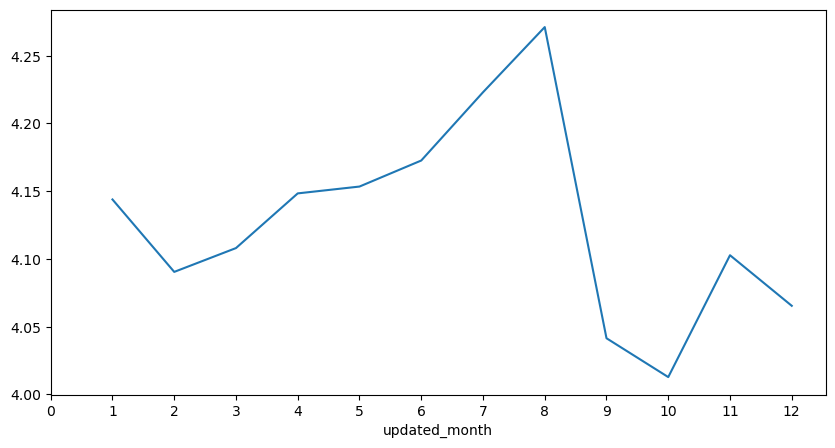

In [333]:
## Plot a line graph
plt.figure(figsize=[10,5])
inp1.groupby('updated_month')['Rating'].mean().plot()
plt.xticks(np.arange(13))
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [338]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, index='updated_month', columns='Content Rating', values='Rating', aggfunc=sum)

Content Rating  Everyone  Everyone 10+  Mature 17+    Teen
updated_month                                             
1                1396.80        100.70       69.00  115.90
2                1451.90         64.80       57.80  127.10
3                1865.00         80.70       64.00  208.60
4                1654.60         46.50       80.30  201.50
5                2780.80        110.90       95.40  335.60
6                3518.10        190.40      224.10  482.00
7                8081.10        415.00      669.70 1277.60
8                4119.00        244.40      329.80  654.20
9                 834.80         71.50       25.40  102.90
10               1057.50         33.60       29.30  139.60
11               1064.90         25.10       22.50  110.10
12               1114.50         37.60       42.30  143.10

In [339]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, index='updated_month', columns='Content Rating', values='Rating', aggfunc=sum)

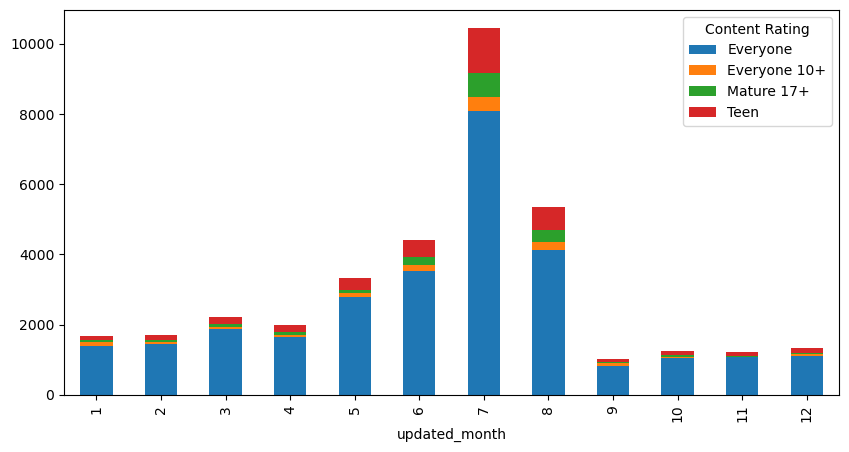

In [341]:
##Plot the stacked bar chart.
monthly.plot(kind='bar', stacked=True, figsize=[10,5])
plt.show()

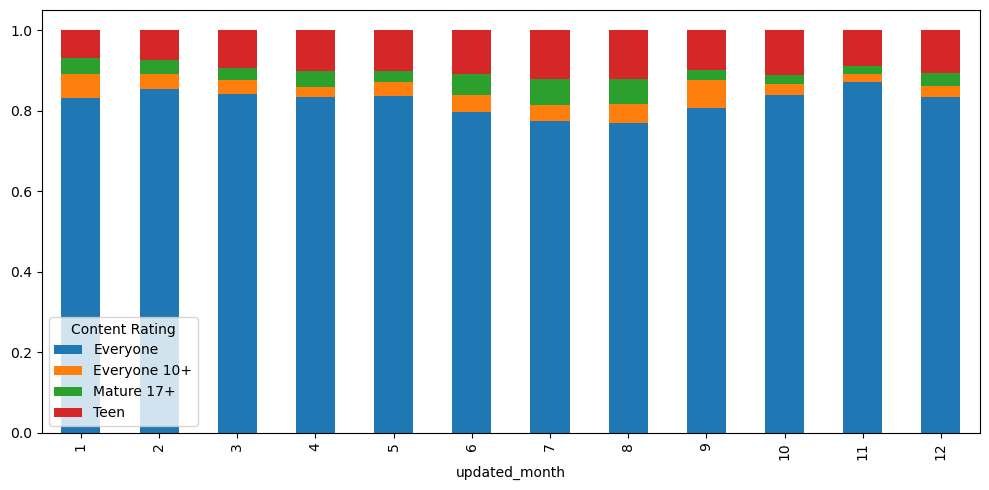

In [367]:
##Plot the stacked bar chart again wrt to the proportions.
monthly[["Everyone", 'Everyone 10+', "Mature 17+", "Teen"]].apply(lambda x: x/x.sum(), axis=1).plot(
        kind='bar', stacked=True, figsize=[10,5])
plt.tight_layout()
plt.show()

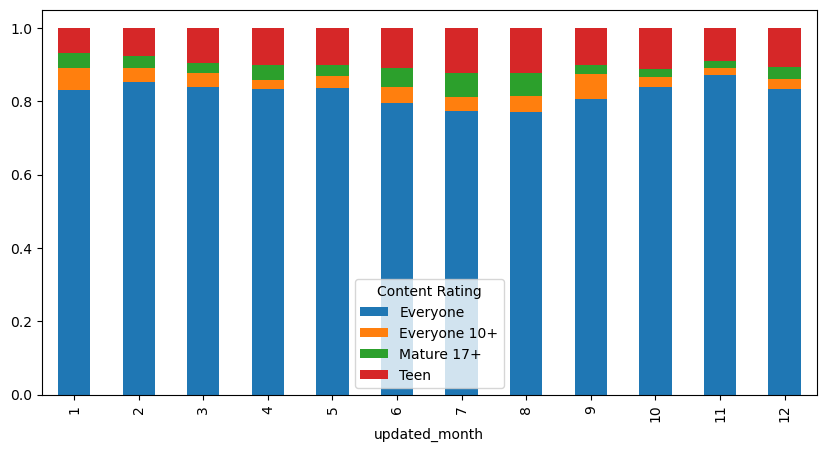

In [393]:
monthly.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, figsize=[10,5])
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [ ]:
#Install plotly


In [397]:
#Take the table you want to plot in a separate variable
res3 = inp1.groupby('updated_month')['Rating'].mean().reset_index()
res3

updated_month  Rating
0               1    4.14
1               2    4.09
2               3    4.11
3               4    4.15
4               5    4.15
5               6    4.17
6               7    4.22
7               8    4.27
8               9    4.04
9              10    4.01
10             11    4.10
11             12    4.07

In [398]:
#Import the plotly libraries
import plotly.express as px

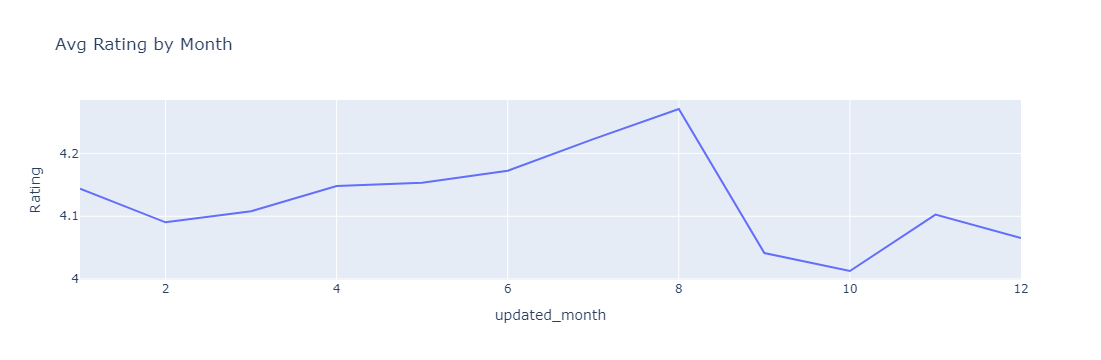

In [402]:
#Prepare the plot
ax = px.line(res3, x='updated_month', y='Rating', title="Avg Rating by Month")
ax.show()